Esse script é o produto do REO2 - Lista de exercícios - da disciplina de Avanços em Genética e Melhoramento de Plantas (PGM848) do Período letivo 2020/1. Para mais informações, acesse: https://github.com/VQCarneiro/Visao-Computacional-no-Melhoramento-de-Plantas

                                UNIVERSIDADE FEDERAL DE LAVRAS - UFLA
                                    DEPARTAMENTO DE BIOLOGIA - DBI
                        PROGRAMA DE PÓS-GRADUÇÃO EM GENÉTICA E MELHORAMENTO DE PLANTAS
                DISCIPLINA PGM848 - AVANÇOS CIENTÍFICOS EM GENÉTICA E MELHORAMENTO DE PLANTAS
                                DOCENTE DSc. VINÍCIUS QUINTÃO CARNEIRO
                                 DISCENTE ERIK MICAEL DA SILVA SOUZA
                              REO2 - PROCESSAMENTO DE IMAGENS EM PYTHON 3

                                        LISTA DE EXERCÍCIOS

Obs.: Importar as bibliotecas necessárias para resolução desta lista de exercícios: numpy, opencv (cv2) & matplotlib.

In [61]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

**EXERCÍCIO 01:**

**Selecione uma imagem a ser utilizada no trabalho prático e realize os seguintes processos utilizando
o pacote OPENCV do Python:**

In [62]:
arquivo = "abobrinhas.png"
imagem = cv2.imread(arquivo,1) 
imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2RGB)

**a) Apresente a imagem e as informações de número de linhas e colunas; número de canais e número total de pixels;**

- Apresentação da imagem a ser trabalhada:

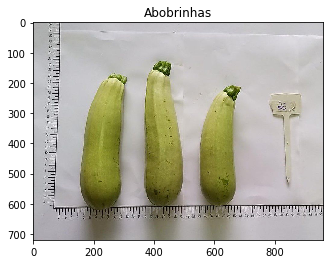

In [63]:
plt.figure('Exercício 1 - letra a')
plt.imshow(imagem)
plt.title("Abobrinhas")
plt.show()

- Informações da imagem:

In [64]:
lin, col, canais = np.shape(imagem)
print('Número de linhas: {} '.format(lin))
print('Número de colunas: {}'.format(col))
print('Número de canais: {} ' .format(canais))
print('Número total de pixel: {}x{} ' .format(lin, col))

Número de linhas: 720 
Número de colunas: 961
Número de canais: 3 
Número total de pixel: 720x961 


**b) Faça um recorte da imagem para obter somente a área de interesse.Utilize esta imagem para a solução das próximas alternativas;**

- Recortar e salvar imagem:

In [65]:
imagem = cv2.imread('abobrinhas.png')
recorte = imagem[100:650, 120:700]
cv2.imwrite("recorte.jpg", recorte)

True

- Converter imagem em RGB e plotar figura:

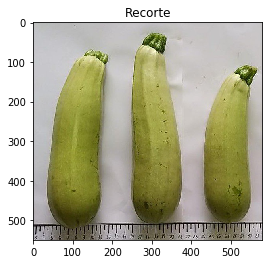

In [66]:
img_rc = 'recorte.jpg'
img_bgr = cv2.imread(img_rc,1)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.figure('Exercício 1 - letra b')
plt.imshow(img_rgb)
plt.title("Recorte")
plt.show()

- Informações da imagem:

In [67]:
lin2, col2, canais2 = np.shape(img_rgb)
print('Número de linhas: {}' .format(lin2))
print('Número de colunas: {}'.format(col2))
print('Número de canais: {}'.format(canais2))
print('Número total de pixel: {}x{}'.format(lin2, col2))

Número de linhas: 550
Número de colunas: 580
Número de canais: 3
Número total de pixel: 550x580


**c) Converta a imagem colorida para uma de escala de cinza (intensidade) e a apresente utilizando os mapas de cores
“Escala de Cinza” e “JET”;**

- Converter imagem colorida em escala cinza:

In [68]:
img_rc = 'recorte.jpg'
img_bgr = cv2.imread(img_rc,1)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_cinza = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

- Mapas de cores:

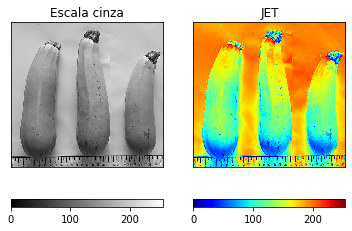

In [69]:
plt.figure('Exercício 1 - letra c')
plt.subplot(1,2,1)
plt.imshow(img_cinza, cmap = 'gray')
plt.title("Escala cinza")
plt.xticks([]) # Eliminar o eixo X
plt.yticks([])  # #liminar o eixo y
plt.colorbar(orientation = 'horizontal')
plt.subplot(1,2,2)
plt.imshow(img_cinza, cmap = 'jet')
plt.title("JET")
plt.xticks([]) # Eliminar o eixo X
plt.yticks([])  # #liminar o eixo y
plt.colorbar(orientation = 'horizontal')
plt.show()

**d) Apresente a imagem em escala de cinza e o seu respectivo histograma; Relacione o histograma e a imagem.**

- Histograma da imagem:

In [70]:
histograma = cv2.calcHist([img_cinza],[0],None,[256],[0,256])
#[img_cinza]: img em escala cinza; [0]: um unico canal (uma matriz); None: mascara (usada p/ selecionar um regiao da
# img); 256 = n. de pontos (0-255); [0,256] = intervalo bits

- Dimensão:

In [71]:
dim = len(histograma)
print('Dimensão do Histograma: {}'.format(dim))

Dimensão do Histograma: 256


- Plotar figuras:

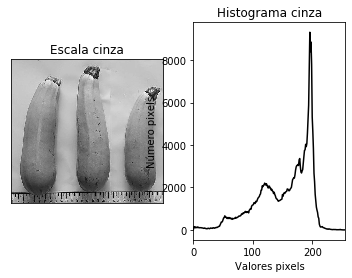

In [72]:
plt.figure('Exercício 1 - letra d')
plt.subplot(1,2,1)
plt.imshow(img_cinza,cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Escala cinza")

plt.subplot(1,2,2)
plt.plot(histograma,color = 'black')
plt.title("Histograma cinza")
plt.xlim([0,256])
plt.xlabel("Valores pixels")
plt.ylabel("Número pixels")

plt.show()

**e) Utilizando a imagem em escala de cinza (intensidade) realize a segmentação da imagem de
modo a remover o fundo da imagem utilizando um limiar manual e o limiar obtido pela técnica
de Otsu. Nesta questão apresente o histograma com marcação dos limiares utilizados, a
imagem limiarizada (binarizada) e a imagem colorida final obtida da segmentação. Explique
os resultados.**

- Limiarização - Thresholding:
- Limiar manual:

In [109]:
limiar_cinza = 130
(L, img_limiar) = cv2.threshold(img_cinza,limiar_cinza,255,cv2.THRESH_BINARY)

(L, img_limiar_inv) = cv2.threshold(img_cinza,limiar_cinza,255,cv2.THRESH_BINARY_INV)
print('Limiar: {}'.format(L))

Limiar: 130.0


- Plotar figuras - Limiar Manual:

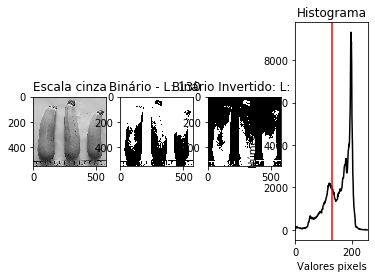

In [110]:
plt.figure('Limiar')
plt.subplot(1,4,1)
plt.imshow(img_cinza,cmap='gray')
plt.title('Escala cinza')

plt.subplot(1,4,2)
plt.imshow(img_limiar,cmap='gray')
plt.title('Binário - L: {} '.format(limiar_cinza))

plt.subplot(1,4,3)
plt.imshow(img_limiar_inv,cmap='gray')
plt.title('Binário Invertido: L: {}'.format(limiar_cinza))

plt.subplot(1,4,4)
plt.plot(histograma,color = 'black')
plt.axvline(x=limiar_cinza,color = 'r')
plt.title("Histograma")
plt.xlim([0,256])
plt.xlabel("Valores pixels")
plt.ylabel("Número pixels")

plt.show()

- Limiar técnica de Otsu:

In [75]:
(L,img_otsu) = cv2.threshold(img_cinza,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
(L, img_otsu_inv) = cv2.threshold(img_cinza,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print('Limiar: {}'.format(L))

Limiar: 143.0


- Plotar figuras - OTSU:

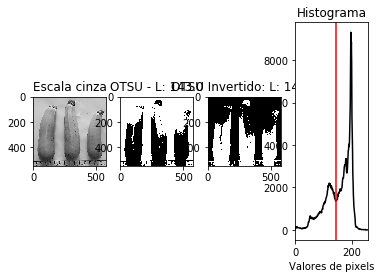

In [76]:
plt.figure('Limiar_Otsu')
plt.subplot(1,4,1)
plt.imshow(img_cinza,cmap='gray')
plt.title('Escala cinza')

plt.subplot(1,4,2)
plt.imshow(img_otsu,cmap='gray')
plt.title('OTSU - L: ' + str(L))

plt.subplot(1,4,3)
plt.imshow(img_otsu_inv,cmap='gray')
plt.title('OTSU Invertido: L: {}'.format(L))

plt.subplot(1,4,4)
plt.plot(histograma,color = 'black')
plt.axvline(x=L,color = 'r')
plt.title("Histograma")
plt.xlim([0,256])
plt.xlabel("Valores de pixels")

plt.show()

- Obtendo imagem colorida segmentada:

In [77]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_segmentada = cv2.bitwise_and(img_rgb,img_rgb,mask=img_limiar)

- Plotar figuras:

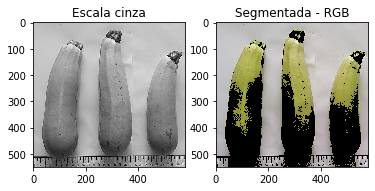

In [78]:
plt.figure('Exercício 1 - letra e')
plt.subplot(1,2,1)
plt.imshow(img_cinza,cmap='gray')
plt.title('Escala cinza')

plt.subplot(1,2,2)
plt.imshow(img_segmentada)
plt.title('Segmentada - RGB')

plt.show()

**f) Apresente uma figura contento a imagem selecionada nos sistemas RGB, Lab, HSV e YCrCb.**

- Imagem RGB:

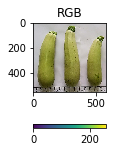

In [79]:
plt.figure('Exercício 1 - letra f')
plt.subplot(1,4,1)
plt.imshow(img_rgb)
plt.title("RGB")
plt.colorbar(orientation = 'horizontal')

- Imagem Lab:

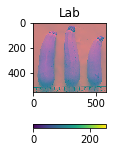

In [80]:
img_Lab = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2Lab)

plt.subplot(1,4,2)
plt.imshow(img_Lab)
plt.title("Lab")
plt.colorbar(orientation = 'horizontal')

- Imagem HSV:

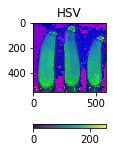

In [81]:
img_HSV = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
plt.subplot(1,4,3)
plt.imshow(img_HSV)
plt.title("HSV")
plt.colorbar(orientation = 'horizontal')

- Imagem YCrCb:

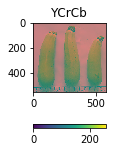

In [82]:
img_YCRCB = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2YCR_CB)
plt.subplot(1,4,4)
plt.imshow(img_YCRCB)
plt.title("YCrCb")
plt.colorbar(orientation = 'horizontal')
plt.show()

**g) Apresente uma figura para cada um dos sistemas de cores (RGB, HSV, Lab e YCrCb) contendo a imagem de cada um dos canais e seus respectivos histogramas.**

- Imagem RGB:

Text(0.5, 1.0, 'RGB')

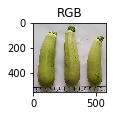

In [83]:
plt.figure('Exercício 1 - letra g')
plt.subplot(2,4,1)
plt.imshow(img_rgb)
plt.title("RGB")

- Histograma RGB:

Text(0, 0.5, 'Número de pixels')

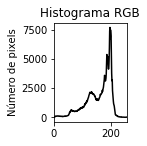

In [84]:
hist_RGB = cv2.calcHist([img_rgb],[0],None,[256],[0,256])
plt.subplot(2,4,2)
plt.plot(hist_RGB,color = 'black')
plt.title("Histograma RGB")
plt.xlim([0,256])
plt.ylabel("Número de pixels")

- Imagem Lab:

Text(0.5, 1.0, 'Lab')

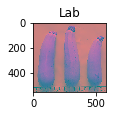

In [85]:
img_Lab = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2Lab)
plt.subplot(2,4,5)
plt.imshow(img_Lab)
plt.title("Lab")

- Histograma Lab:

Text(0, 0.5, 'Número de pixels')

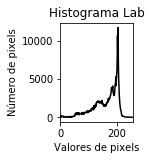

In [86]:
hist_Lab = cv2.calcHist([img_Lab],[0],None,[256],[0,256])
plt.subplot(2,4,6)
plt.plot(hist_Lab,color = 'black')
plt.title("Histograma Lab")
plt.xlim([0,256])
plt.xlabel("Valores de pixels")
plt.ylabel("Número de pixels")

- Imagem HSV:

Text(0.5, 1.0, 'HSV')

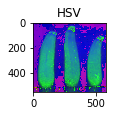

In [87]:
img_HSV = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
plt.subplot(2,4,3)
plt.imshow(img_HSV)
plt.title("HSV")

- Histograma HSV:

Text(0, 0.5, 'Número de pixels')

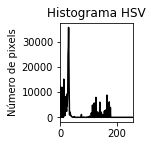

In [88]:
hist_HSV = cv2.calcHist([img_HSV],[0],None,[256],[0,256])
plt.subplot(2,4,4)
plt.plot(hist_HSV,color = 'black')
plt.title("Histograma HSV")
plt.xlim([0,256])
plt.ylabel("Número de pixels")

- Imagem YCrCb:

Text(0.5, 1.0, 'YCrCb')

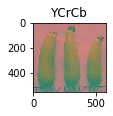

In [89]:
img_YCRCB = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2YCR_CB)
plt.subplot(2,4,7)
plt.imshow(img_YCRCB)
plt.title("YCrCb")

- Histograma YCrCb:

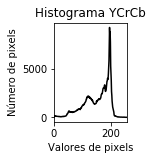

In [90]:
hist_YCrCb = cv2.calcHist([img_YCRCB],[0],None,[256],[0,256])
plt.subplot(2,4,8)
plt.plot(hist_YCrCb,color = 'black')
plt.title("Histograma YCrCb")
plt.xlim([0,256])
plt.xlabel("Valores de pixels")
plt.ylabel("Número de pixels")

plt.show()

**h) Encontre o sistema de cor e o respectivo canal que propicie melhor segmentação da imagem
de modo a remover o fundo da imagem utilizando limiar manual e limiar obtido pela técnica
de Otsu. Nesta questão apresente o histograma com marcação dos limiares utilizados, a
imagem limiarizada (binarizada) e a imagem colorida final obtida da segmentação. Explique
os resultados e sua escolha pelo sistema de cor e canal utilizado na segmentação. Nesta
questão apresente a imagem limiarizada (binarizada) e a imagem colorida final obtida da
segmentação.**

- Leitura da imagem:

In [91]:
img_rc = 'recorte.jpg'
img_bgr = cv2.imread(img_rc,1)
img_HSV = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
H,S,V = cv2.split(img_HSV)

- Histograma de imagem:

In [92]:
hist_H = cv2.calcHist([img_HSV],[0],None,[256],[0,256])
hist_S = cv2.calcHist([img_HSV],[1],None,[256],[0,256])
hist_V = cv2.calcHist([img_HSV],[2],None,[256],[0,256])

- Limiar manual:

In [93]:
limiar_H = 80
(L_H, img_limiar_H) = cv2.threshold(H,limiar_H,255,cv2.THRESH_BINARY)
limiar_S = 90
(L_S, img_limiar_S) = cv2.threshold(S,limiar_S,255,cv2.THRESH_BINARY_INV)
limiar_V = 180
(L_V, img_limiar_V) = cv2.threshold(V,limiar_V,255,cv2.THRESH_BINARY_INV)

- Limiarização - Thresholding - OTSU:

In [94]:
(L_H, img_limiar_H) = cv2.threshold(H,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
(L_S, img_limiar_S) = cv2.threshold(S,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
(L_V, img_limiar_V) = cv2.threshold(V,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

- Plotar imagens - Limiar manual:

Text(0, 0.5, 'Número de Pixels')

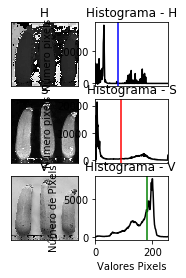

In [95]:
plt.figure('Exercício 1 - letra h.1')
plt.subplot(3,4,1)
plt.imshow(img_HSV[:,:,0],cmap='gray')
plt.title("H")
plt.xticks([])
plt.yticks([])

plt.subplot(3,4,2)
plt.plot(hist_H,color = 'black')
plt.axvline(x=limiar_H, color = 'blue')
plt.title("Histograma - H")
plt.xlim([0,256])
plt.ylabel("Número pixels")
plt.xticks([])

plt.subplot(3,4,5)
plt.imshow(img_HSV[:,:,1],cmap='gray')
plt.title("S")
plt.xticks([])
plt.yticks([])

plt.subplot(3,4,6)
plt.plot(hist_S,color = 'black')
plt.axvline(x=limiar_S,color = 'red')
plt.title("Histograma - S")
plt.xlim([0,256])
plt.ylabel("Número pixels")
plt.xticks([])

plt.subplot(3,4,9)
plt.imshow(img_HSV[:,:,2],cmap='gray')
plt.title("V")
plt.xticks([])
plt.yticks([])

plt.subplot(3,4,10)
plt.plot(hist_V,color = 'black')
plt.axvline(x=limiar_V,color = 'green')
plt.title("Histograma - V ")
plt.xlim([0,256])
plt.xlabel("Valores Pixels")
plt.ylabel("Número de Pixels")

- Plotar Imagens - Limiar Otsu:

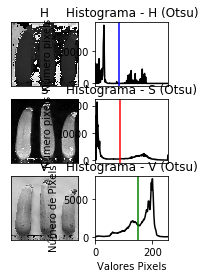

In [96]:
plt.subplot(3,4,3)
plt.imshow(img_HSV[:,:,0],cmap='gray')
plt.title("H")
plt.xticks([])
plt.yticks([])

plt.subplot(3,4,4)
plt.plot(hist_H,color = 'black')
plt.axvline(x=L_H, color = 'blue')
plt.title("Histograma - H (Otsu)")
plt.xlim([0,256])
plt.ylabel("Número pixels")
plt.xticks([])

plt.subplot(3,4,7)
plt.imshow(img_HSV[:,:,1],cmap='gray')
plt.title("S")
plt.xticks([])
plt.yticks([])

plt.subplot(3,4,8)
plt.plot(hist_S,color = 'black')
plt.axvline(x=L_S,color = 'red')
plt.title("Histograma - S (Otsu)")
plt.xlim([0,256])
plt.ylabel("Número pixels")
plt.xticks([])

plt.subplot(3,4,11)
plt.imshow(img_HSV[:,:,2],cmap='gray')
plt.title("V")
plt.xticks([])
plt.yticks([])

plt.subplot(3,4,12)
plt.plot(hist_V,color = 'black')
plt.axvline(x=L_V,color = 'green')
plt.title("Histograma - V (Otsu)")
plt.xlim([0,256])
plt.xlabel("Valores Pixels")
plt.ylabel("Número de Pixels")
plt.show()

- Obter imagem colorida segmentada:

In [97]:
img_segm = cv2.bitwise_and(img_HSV,img_HSV,mask=img_limiar_S)

- Plotar imagem colorida segmentada:

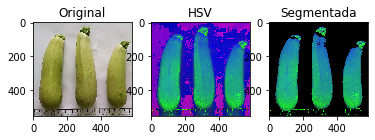

In [98]:
plt.figure('Exercício 1 - letra h.2')
plt.subplot(1,3,1)
plt.imshow(img_rgb,cmap="gray")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(img_HSV,cmap="gray")
plt.title("HSV")

plt.subplot(1,3,3)
plt.imshow(img_segm)
plt.title('Segmentada')
plt.show()

**i) Obtenha o histograma de cada um dos canais da imagem em RGB, utilizando como mascara a imagem limiarizada (binarizada) da letra h.**

- Histograma de imagem:

In [99]:
(L_S, img_limiar_S) = cv2.threshold(S,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
hist_r = cv2.calcHist([img_rgb],[0],img_limiar_S,[256],[0,256])
hist_g = cv2.calcHist([img_rgb],[1],img_limiar_S,[256],[0,256])
hist_b = cv2.calcHist([img_rgb],[2],img_limiar_S,[256],[0,256])

- Plotar Imagem RGB:

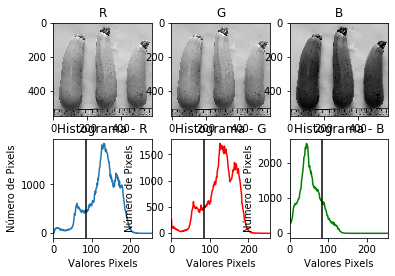

In [100]:
plt.figure('Exercício 1 - letra i')
plt.subplot(2,3,1)
plt.imshow(img_rgb[:,:,0],cmap='gray')
plt.title("R")

plt.subplot(2,3,4)
plt.plot(hist_r)
plt.axvline(x=L_S, color='black')
plt.title("Histograma - R")
plt.xlim([0,256])
plt.xlabel("Valores Pixels")
plt.ylabel("Número de Pixels")

plt.subplot(2,3,2)
plt.imshow(img_rgb[:,:,1],cmap='gray')
plt.title("G")

plt.subplot(2,3,5)
plt.plot(hist_g,color = 'red')
plt.axvline(x=L_S, color='black')
plt.title("Histograma - G")
plt.xlim([0,256])
plt.xlabel("Valores Pixels")
plt.ylabel("Número de Pixels")

plt.subplot(2,3,3)
plt.imshow(img_rgb[:,:,2],cmap='gray')
plt.title("B")

plt.subplot(2,3,6)
plt.plot(hist_b,color = 'green')
plt.axvline(x=L_S, color='black')
plt.title("Histograma - B")
plt.xlim([0,256])
plt.xlabel("Valores Pixels")
plt.ylabel("Número de Pixels")

plt.show()

**j) Realize operações aritméticas na imagem em RGB de modo a realçar os aspectos de seu interesse. Exemplo (2*R-0.5*G). Explique a sua escolha pelas operações aritméticas. Segue abaixo algumas sugestões.**

- Operação aritmética na imagem RGB (-0.5*B)/R :

C:\Users\Erik-Souza\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


[[-0.5026455  -0.5026738  -0.5027027  ... -0.49746193 -0.49746193
  -0.49746193]
 [-0.50265957 -0.50265957 -0.5026738  ... -0.49747475 -0.49746193
  -0.49746193]
 [-0.50265957 -0.50265957 -0.50265957 ... -0.49747475 -0.49747475
  -0.49747475]
 ...
 [-0.51183432 -0.51226994 -0.51117318 ... -0.50251256 -0.50260417
  -0.50253807]
 [-0.51098901 -0.51081081 -0.51111111 ... -0.50273224 -0.50277778
  -0.50241546]
 [-0.51219512 -0.51136364 -0.51242236 ... -0.5025641  -0.50251256
  -0.5025641 ]]
 


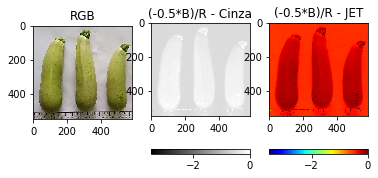

In [102]:
operacao_img = -0.5*img_rgb[:,:,2] / img_rgb[:,:,0]
print(operacao_img)
print(' ')

plt.figure('Exercício 1 - letra j')
plt.subplot(1,3,1)
plt.imshow(img_rgb,cmap='gray')
plt.title("RGB")

plt.subplot(1,3,2)
plt.imshow(operacao_img,cmap='gray')
plt.title("(-0.5*B)/R - Cinza")
plt.colorbar(orientation = 'horizontal')

plt.subplot(1,3,3)
plt.imshow(operacao_img,cmap='jet')
plt.title("(-0.5*B)/R - JET")
plt.colorbar(orientation = 'horizontal')
plt.show()